# Logistic Regression

In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('C://Users//HP//Desktop//Bankruptcy_data.csv')
df

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,1,0.135370,0.45185,0.311620,2.0469,10.2340,0.167680,0.167630,1.21310,2.25540,...,0.078728,0.246950,0.92586,0.183620,9.0895,8.8342,48.172,7.5770,5.7725,0
1,2,0.005861,0.39858,0.197680,1.9390,9.5771,0.000000,0.007237,1.50890,0.97880,...,0.269720,0.000000,0.79303,0.312710,6.2213,4.2785,78.499,4.6497,1.6539,0
2,3,0.110600,0.16117,0.478940,7.5711,263.9000,0.000000,0.138360,5.20450,0.68447,...,0.159870,0.131850,0.80748,0.102340,9.4499,3.3443,38.867,9.3910,1.5272,0
3,4,0.063911,1.40730,-0.295950,0.5291,-46.2870,-0.714200,0.079071,-0.33076,0.98490,...,-0.015327,-0.137300,1.01530,-1.673200,29.2710,14.1410,73.458,4.9688,4.6785,0
4,5,0.131680,0.66031,0.441210,2.7098,-23.5960,-0.200070,0.131910,0.51445,2.13570,...,0.110170,0.387640,0.93881,1.184200,4.5462,15.1400,44.101,8.2764,7.1014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36548,36549,0.425980,0.18731,0.361740,3.0086,50.2570,1.292900,0.425980,3.96720,1.38350,...,0.277220,0.573240,0.72278,0.009708,5.8118,6.8880,49.236,7.4133,2.9141,0
36549,36550,-0.016238,0.43902,0.069466,1.1678,-191.5900,0.004549,-0.021788,1.10850,0.94926,...,-0.053449,-0.033368,1.05340,0.051323,1.6096,4.8027,264.150,1.3818,1.1077,0
36550,36551,0.073750,0.18138,0.219690,3.5020,66.4360,0.169420,0.092655,4.51320,1.09190,...,0.084195,0.090091,0.91581,0.114310,25.1320,6.8017,32.664,11.1740,1.4168,0
36551,36552,-0.871080,1.16990,-0.187060,0.8401,-62.6570,-0.028145,-0.871080,-0.14521,1.89250,...,-0.468900,5.127500,1.44510,0.000000,6.3770,2.9560,225.630,1.6177,110.1700,0


In [6]:
df.describe()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,36553.000000,36545.000000,36545.000000,36545.000000,36442.000000,3.647700e+04,36545.000000,36545.000000,36474.000000,36546.000000,...,3.644000e+04,36546.000000,3.647700e+04,36546.000000,3.472000e+04,36467.000000,3.644000e+04,36442.000000,35859.000000,36553.000000
mean,18277.000000,0.051461,0.577743,0.127402,6.838949,-4.823320e+02,-0.030899,0.115142,12.906786,2.674919,...,-3.114462e+01,-0.017852,3.495525e+01,1.480542,4.820583e+02,17.681064,1.783960e+03,9.416529,77.345570,0.048286
std,10552.086531,1.670725,5.438081,4.917424,321.804895,6.617408e+04,6.518182,5.628794,520.063823,64.903626,...,5.806271e+03,14.507844,5.812797e+03,132.743470,3.509410e+04,600.955679,1.512356e+05,131.812478,2560.625896,0.214373
min,1.000000,-256.890000,-430.870000,-479.960000,-0.045319,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-1.496500e+04,-0.367890,-3.726500,0.000000
25%,9139.000000,0.003342,0.269610,0.022121,1.050625,-4.900900e+01,0.000000,0.005693,0.428970,1.018700,...,9.144250e-03,0.014675,8.751900e-01,0.000000,5.524575e+00,4.512200,4.212250e+01,3.098925,2.187150,0.000000
50%,18277.000000,0.049595,0.472550,0.197470,1.571500,-8.095900e-01,0.000000,0.059546,1.069300,1.199900,...,5.293650e-02,0.120480,9.508600e-01,0.005514,9.753600e+00,6.634200,7.141350e+01,5.078750,4.308900,0.000000
75%,27415.000000,0.130080,0.689240,0.404840,2.794200,5.104700e+01,0.086872,0.151670,2.606125,2.063000,...,1.294525e-01,0.286285,9.927100e-01,0.234970,2.016175e+01,10.379500,1.171925e+02,8.606525,9.788900,0.000000
max,36553.000000,94.280000,480.960000,28.336000,53433.000000,1.034100e+06,543.250000,649.230000,53432.000000,9742.300000,...,1.120200e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [7]:
df.head()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,1,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,2,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,3,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,...,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,4,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,...,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,5,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,...,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


In [8]:
df.tail()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
36548,36549,0.425980,0.18731,0.361740,3.0086,50.257,1.292900,0.425980,3.96720,1.38350,...,0.277220,0.573240,0.72278,0.009708,5.8118,6.8880,49.236,7.4133,2.9141,0
36549,36550,-0.016238,0.43902,0.069466,1.1678,-191.590,0.004549,-0.021788,1.10850,0.94926,...,-0.053449,-0.033368,1.05340,0.051323,1.6096,4.8027,264.150,1.3818,1.1077,0
36550,36551,0.073750,0.18138,0.219690,3.5020,66.436,0.169420,0.092655,4.51320,1.09190,...,0.084195,0.090091,0.91581,0.114310,25.1320,6.8017,32.664,11.1740,1.4168,0
36551,36552,-0.871080,1.16990,-0.187060,0.8401,-62.657,-0.028145,-0.871080,-0.14521,1.89250,...,-0.468900,5.127500,1.44510,0.000000,6.3770,2.9560,225.630,1.6177,110.1700,0
36552,36553,0.063897,0.84939,0.285080,1.5568,-3.031,-0.116920,0.083468,0.17731,4.83790,...,0.020425,0.424280,0.97650,1.983700,15.3120,16.4280,38.627,9.4494,23.8590,1


In [9]:
df.shape

(36553, 66)

In [10]:
from sklearn import preprocessing
from sklearn .preprocessing import Imputer

In [11]:
imputer= Imputer()
df1= pd.DataFrame (imputer.fit_transform(df))
df1.isnull().sum()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0     0
1     0
2     0
3     0
4     0
     ..
61    0
62    0
63    0
64    0
65    0
Length: 66, dtype: int64

In [12]:
x=df1.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.0,0.135370,0.45185,0.311620,2.0469,10.2340,0.167680,0.167630,1.21310,2.25540,...,1189.700,0.078728,0.246950,0.92586,0.183620,9.0895,8.8342,48.172,7.5770,5.7725
1,2.0,0.005861,0.39858,0.197680,1.9390,9.5771,0.000000,0.007237,1.50890,0.97880,...,1.939,0.269720,0.000000,0.79303,0.312710,6.2213,4.2785,78.499,4.6497,1.6539
2,3.0,0.110600,0.16117,0.478940,7.5711,263.9000,0.000000,0.138360,5.20450,0.68447,...,6092.300,0.159870,0.131850,0.80748,0.102340,9.4499,3.3443,38.867,9.3910,1.5272
3,4.0,0.063911,1.40730,-0.295950,0.5291,-46.2870,-0.714200,0.079071,-0.33076,0.98490,...,-13606.000,-0.015327,-0.137300,1.01530,-1.673200,29.2710,14.1410,73.458,4.9688,4.6785
4,5.0,0.131680,0.66031,0.441210,2.7098,-23.5960,-0.200070,0.131910,0.51445,2.13570,...,75.681,0.110170,0.387640,0.93881,1.184200,4.5462,15.1400,44.101,8.2764,7.1014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36548,36549.0,0.425980,0.18731,0.361740,3.0086,50.2570,1.292900,0.425980,3.96720,1.38350,...,15766.000,0.277220,0.573240,0.72278,0.009708,5.8118,6.8880,49.236,7.4133,2.9141
36549,36550.0,-0.016238,0.43902,0.069466,1.1678,-191.5900,0.004549,-0.021788,1.10850,0.94926,...,3576.300,-0.053449,-0.033368,1.05340,0.051323,1.6096,4.8027,264.150,1.3818,1.1077
36550,36551.0,0.073750,0.18138,0.219690,3.5020,66.4360,0.169420,0.092655,4.51320,1.09190,...,6003.900,0.084195,0.090091,0.91581,0.114310,25.1320,6.8017,32.664,11.1740,1.4168
36551,36552.0,-0.871080,1.16990,-0.187060,0.8401,-62.6570,-0.028145,-0.871080,-0.14521,1.89250,...,-12.708,-0.468900,5.127500,1.44510,0.000000,6.3770,2.9560,225.630,1.6177,110.1700


In [13]:
y=df1.iloc[:,-1:]
y

,65
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
36548,0.0
36549,0.0
36550,0.0
36551,0.0


In [14]:
from sklearn.linear_model import LogisticRegression
Logmodel= LogisticRegression()
Log_model=Logmodel.fit(x,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
Log_model.coef_

array([[-1.09566584e-04, -4.60138038e-05, -1.76578656e-05,
        -1.88018487e-04, -5.39299469e-04, -1.64703857e-07,
        -1.74132712e-04, -6.30004521e-05, -1.62461413e-04,
        -5.46404644e-04, -3.69731038e-04, -7.11895926e-05,
        -8.67874280e-04,  8.89512307e-05, -6.30029511e-05,
        -5.33710549e-08, -6.57110558e-04, -5.16537650e-04,
        -6.42356424e-05,  6.47551859e-05, -2.50672776e-03,
        -5.21557014e-04, -6.63310730e-05,  6.00188873e-05,
        -1.19188737e-04, -3.43686305e-04, -5.91428579e-04,
        -4.60159452e-06, -5.47318749e-04, -1.36128448e-03,
         5.32686897e-04,  7.30750981e-05,  2.60352526e-06,
        -1.24930740e-03, -6.85988241e-04, -7.76012976e-05,
        -5.98314558e-04, -5.53810657e-03, -4.10535224e-04,
        -1.24559139e-03,  2.44705887e-05, -4.95546120e-04,
         8.35895680e-05, -1.26984291e-03,  1.23686752e-03,
        -2.34646773e-05, -4.89398705e-04, -3.24688938e-03,
        -3.36882859e-05, -1.53456528e-05, -3.94025299e-0

In [16]:
Log_model.intercept_

array([-0.00032539])

In [17]:
y_pred= Log_model.predict(x)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
Log_model.score(x,y)

0.9512488715016552

In [19]:
from sklearn.metrics import classification_report 

In [20]:
print (classification_report (y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     34788
         1.0       0.13      0.00      0.00      1765

    accuracy                           0.95     36553
   macro avg       0.54      0.50      0.49     36553
weighted avg       0.91      0.95      0.93     36553



In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[34768    20]
 [ 1762     3]]


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,Log_model.predict(x))
Logit_roc_score

0.5005624029125344

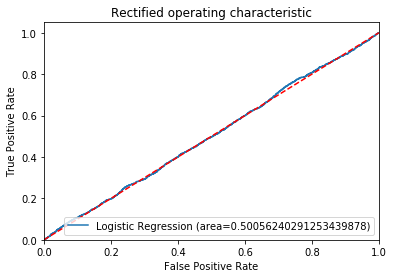

In [24]:
fpr, tpr, thresholds = roc_curve(y,Log_model.predict_proba(x)[:,-1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.20f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rectified operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()